# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

¡Bienvenidos al primer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es dar los primeros pasos en el proceso de exploración de datos usando las herramientas que trabajamos en las activades.

Vamos a enfocarnos en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero debemos limpiar un poco el dataset.

## El dataset: propiedades en venta en Ciudad de Buenos Aires.

En este proyecto, trabajaremos con una muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta. 

## Los atributos
A continuación vamos a describir los atributos que consideramos en esta muestra:

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


## Importando las bibliotecas necesarias

Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset vamos a utilizar las bibliotecas numpy, pandas, matplotlib.pylab y seaborn. 

** 1) Importá ** cada una de ellas con los siguientes nombres: 
- **numpy** como **np**
- **pandas** como **pd**
- **matplotlib.pylab** como **plt**
- **seaborn** como **sns**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
# La siguiente línea es para ver las imagenes dentro del notebook
%matplotlib inline
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12,8)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## Cargando dataset de propiedades

**2) Cargá** el dataset que se encuentra en la carpeta *dataset/* y guardalo en una variable llamada **df**. 
No te olvides de utilizar **parse_dates** sobre la columna **created_on**


In [3]:
df = pd.read_csv('datos_properati.csv')

## Exploración de datos

Lo primero que vamos a hacer es ver qué forma tiene el dataset que acabamos de cargar. Para eso vamos a mostrar las primeras 3 entradas del mismo y utilizar la propiedad `shape` para ver la cantidad de instancias y atributos con los que vamos a estar trabajando.

In [4]:
print(df.shape)
df.head(100)

(18979, 17)


,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.00,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.00,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.00,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.00,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.0,4000.000000,1.0,NaN,NaN,https://www.properati.com.ar/1cw7a_venta_local_palermo_av-santa-fe_5300_garage_subte-linea-d_solucion-inmobiliaria_gx3,PALERMO,14.0
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local_belgrano_dumont-santos_2400_luminoso_impecable_subte-linea-d_urbana-consultores-inmobiliarios,PALERMO,14.0
7,2017-08-11,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5729833,-58.4388579",-34.572983,-58.438858,390000.00,57.0,57.0,6842.105263,NaN,NaN,NaN,https://www.properati.com.ar/1d3k8_venta_local_palermo_cabildo-av-_200_garage_estrenar_subte-linea-d_triada-propiedades,PALERMO,14.0
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.0,2291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1d5sl_venta_local_palermo_zappone-inmobiliaria,PALERMO,14.0
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.0,2500.000000,NaN,NaN,NaN,https://www.properati.com.ar/1d86m_venta_local_palermo_santa-fe-av-_4400_subte-linea-d_gaed-inmobiliaria,PALERMO,14.0


In [5]:
df['created_on'] = pd.to_datetime(df['created_on'])
df.dtypes

created_on                 datetime64[ns]
operation                          object
property_type                      object
place_with_parent_names            object
lat-lon                            object
lat                               float64
lon                               float64
price_aprox_usd                   float64
surface_total_in_m2               float64
surface_covered_in_m2             float64
price_usd_per_m2                  float64
floor                             float64
rooms                             float64
expenses                          float64
properati_url                      object
barrio                             object
comuna                            float64
dtype: object

## Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

**3) Mostrá** las categorías de `property_type` y cuántas instancias hay de cada una.

Recordá utilizar funciones del **dataframe** de pandas para realizar esto.

In [6]:
df.property_type.value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtrando las categorías

De las categorías existentes sólo queremos quedarnos con las que sean casas (house), departamentos (apartment) o PH (PH). 

Para esto, 

**4) filtrá** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguirás usando a lo largo del análisis.


In [7]:
df_filtered = df[(df.property_type == 'house') | (df.property_type == 'apartment') | (df.property_type =='PH')]
df_filtered.property_type.value_counts()

apartment    14807
house         1618
PH            1463
Name: property_type, dtype: int64

### Visualizando las categorías
**5)** Utilizando `seaborn` **creá un countplot** para visualizar las categorías de `df_filtered` en el campo `property_type` 

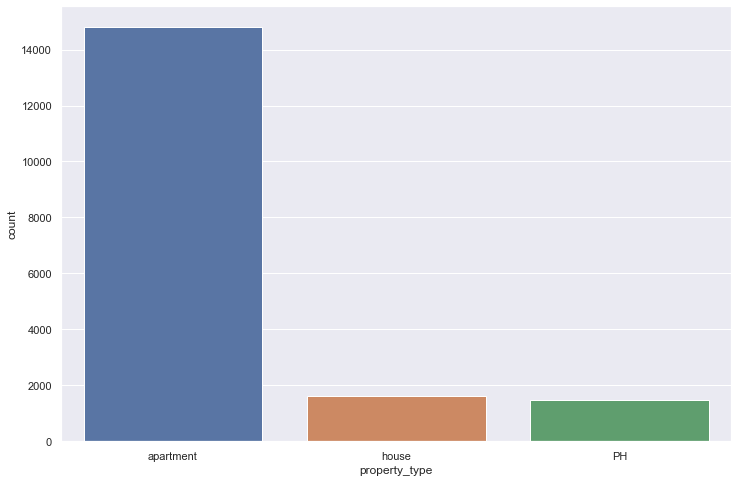

In [8]:
sns.set(style="darkgrid")
sns.countplot(x = 'property_type',
              data = df_filtered,
              order = df_filtered['property_type'].value_counts().index)


## Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.

**6) Quitá** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

In [9]:
df_filtered.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1377
surface_total_in_m2         2197
surface_covered_in_m2       1920
price_usd_per_m2            2681
floor                      15168
rooms                       4481
expenses                   14190
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [10]:
df_filtered.shape

(17888, 17)

In [11]:
df_filtered = df_filtered.dropna(subset=['surface_total_in_m2','price_usd_per_m2','price_aprox_usd','rooms'])

**7)** A continuación **mostrá** cuantas instancias son las que descartaste a partir de quitar las que tenían valores nulos.

In [12]:
df_filtered.shape

(12330, 17)

Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 

**8) Mostrá** qué otros atributos tienen valores faltantes en el `dataframe`.

In [13]:
df_filtered.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd                0
surface_total_in_m2            0
surface_covered_in_m2        355
price_usd_per_m2               0
floor                      10452
rooms                          0
expenses                    9896
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [14]:
## En base a la duda que surgió, comparto la solución que yo encontré.
## Estrategia para reemplazar los valores faltantes de la superficie total del proyecto 1.
## La estrategia va a consistir en calcular la media de la superficie total según la comuna y luego, reemplazar
## los valores faltantes por la media que les corresponda según la comuna en dónde está ubicado el inmueble.

In [15]:
## En primer lugar, se crea un nuevo dataframe filtrado.

In [16]:
df_filtered_m = df[(df.property_type == 'house') | (df.property_type == 'apartment') | (df.property_type =='PH')]

In [17]:
## En segundo lugar, se crea otro dataframe con solo dos columnas y, luego, se cambia a "int" los valores dentro de la columna
## comuna.

In [18]:
df_filtered_m1 = df_filtered_m[['surface_total_in_m2', 'comuna']]
df_filtered_m1['comuna'] = df_filtered_m1.comuna.astype('int')

C:\Users\Emilio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
## En tercer lugar, se hace un groupby de forma tal de obtener el promedio de la superficie total por comuna y luego se convierte
## este output en un diccionario.

In [20]:
superficie_por_comuna = df_filtered_m1.groupby('comuna')['surface_total_in_m2'].mean()
superficie_por_comuna

comuna
1     133.821103
2     120.925597
3      78.559354
4     120.089249
5      86.970874
6      93.957682
7     297.835946
8     127.732759
9     447.455696
10    113.860104
11    132.366197
12     98.882874
13    153.733731
14    139.124713
15     93.970693
Name: surface_total_in_m2, dtype: float64

In [21]:
superficie_por_comuna_dict = superficie_por_comuna.to_dict()
superficie_por_comuna_dict

{1: 133.821103117506,
 2: 120.92559726962457,
 3: 78.55935422602089,
 4: 120.0892494929006,
 5: 86.97087378640776,
 6: 93.9576816927323,
 7: 297.83594566353185,
 8: 127.73275862068965,
 9: 447.45569620253167,
 10: 113.860103626943,
 11: 132.3661971830986,
 12: 98.88287401574803,
 13: 153.73373134328358,
 14: 139.1247134342045,
 15: 93.97069271758437}

In [22]:
df_filtered_m['comuna'] = df_filtered_m.comuna.astype('int')

C:\Users\Emilio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
## Por último, se "mapea" el diccionario resultante en el dataset original, de forma tal que los valores faltantes de la columna
## surface_total_in_m2 sean reemplazados por la media de esta columna dependiendo de la comuna en donde esté el inmueble.

In [24]:
df_filtered_m.surface_total_in_m2 = df_filtered_m.surface_total_in_m2.fillna(df_filtered_m.comuna.map(superficie_por_comuna_dict))

C:\Users\Emilio\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [25]:
df_filtered_m.isnull().sum()

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1377
surface_total_in_m2            0
surface_covered_in_m2       1920
price_usd_per_m2            2681
floor                      15168
rooms                       4481
expenses                   14190
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [26]:
df_filtered_m.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_departamento_palermo_guemes_3600_balcon_suite_jardin_lavadero_luminoso_lujoso_dependencias_placard_doble-circulacion_subte-linea-d_luisio-propiedades-suc-virrey-del-pino-2378,PALERMO,14
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_departamento_palermo_juncal-al-4500_gimnasio_jardin_lavadero_parrilla_piscina_sum_aire-acondicionado_subte-linea-h_subte-linea-c_deptos-temporarios,PALERMO,14
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_departamento_palermo_julian-alvarez-al-1200_lavadero_amoblado_sanchez-carrizo-real-estate,PALERMO,14
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hollywood|,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_palermo-hollywood_jardin_lavadero_piscina_luminoso_vista_garage_nexo-propiedades_h0z,PALERMO,14


In [58]:
df_filtered_2 = df[(df.property_type == 'house') | (df.property_type == 'apartment') | (df.property_type =='PH')]
df_filtered_2.price_usd_per_m2.describe()

count     15207.000000
mean       2748.896095
std        1863.791284
min           0.958333
25%        2000.000000
50%        2555.555556
75%        3160.919540
max      142450.141026
Name: price_usd_per_m2, dtype: float64

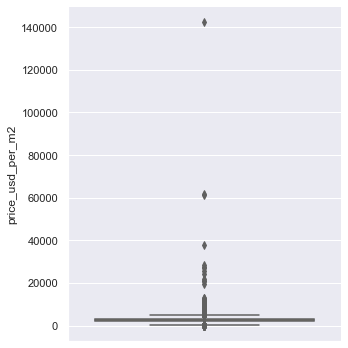

In [60]:
sns.catplot(y="price_usd_per_m2",color="y",n_boot = 500, kind='box' , data=df_filtered_2)

In [61]:
price_q1 = df_filtered_2.price_usd_per_m2.quantile(q = 0.25)
price_q3 = df_filtered_2.price_usd_per_m2.quantile(q = 0.75)
price_iqr = price_q3 - price_q1
df_filtered_2 = df_filtered_2[(df_filtered_2['price_usd_per_m2'] > (price_q1 - 1.5 * price_iqr) )]
df_filtered_2 = df_filtered_2[(df_filtered_2['price_usd_per_m2'] < (price_q3 + 1.5 * price_iqr) )]

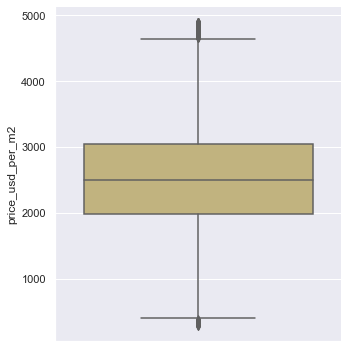

In [62]:
sns.catplot(y="price_usd_per_m2",color="y",n_boot = 500, kind='box' , data=df_filtered_2)

In [64]:
df_filtered_2.price_usd_per_m2.describe()

count    14385.000000
mean      2545.481684
std        831.439227
min        283.582090
25%       1986.666667
50%       2500.000000
75%       3050.847458
max       4901.960784
Name: price_usd_per_m2, dtype: float64

In [84]:
price_usd = df_filtered_2['price_usd_per_m2'].values
bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
cats = pd.cut(price_usd, bins)
cats

[(2500, 3000], (4000, 4500], (2500, 3000], (2000, 2500], (4000, 4500], ..., (500, 1000], (1000, 1500], (500, 1000], (1000, 1500], (1000, 1500]]
Length: 14385
Categories (10, interval[int64]): [(0, 500] < (500, 1000] < (1000, 1500] < (1500, 2000] ... (3000, 3500] < (3500, 4000] < (4000, 4500] < (4500, 5000]]

In [85]:
cats_price = pd.DataFrame(cats)
cats_price.isnull().sum()

0    0
dtype: int64

In [86]:
df_filtered_2['cats_price_usd'] = cats_price
df_surf_price = df_filtered_2[['surface_total_in_m2','cats_price_usd']]
superficie_por_precio = df_filtered_2.groupby('cats_price_usd')['surface_total_in_m2'].mean()
superficie_por_precio

cats_price_usd
(0, 500]         85.611111
(500, 1000]     100.613821
(1000, 1500]    105.125337
(1500, 2000]    100.816494
(2000, 2500]    103.579305
(2500, 3000]    112.477831
(3000, 3500]    107.623207
(3500, 4000]    108.036745
(4000, 4500]    110.592493
(4500, 5000]    114.447115
Name: surface_total_in_m2, dtype: float64

In [88]:
superficie_por_precio_dict = superficie_por_precio.to_dict()
superficie_por_precio_dict

{Interval(0, 500, closed='right'): 85.61111111111111,
 Interval(500, 1000, closed='right'): 100.61382113821138,
 Interval(1000, 1500, closed='right'): 105.12533692722371,
 Interval(1500, 2000, closed='right'): 100.81649371927908,
 Interval(2000, 2500, closed='right'): 103.57930513595166,
 Interval(2500, 3000, closed='right'): 112.4778305621536,
 Interval(3000, 3500, closed='right'): 107.62320730117341,
 Interval(3500, 4000, closed='right'): 108.03674540682415,
 Interval(4000, 4500, closed='right'): 110.59249329758713,
 Interval(4500, 5000, closed='right'): 114.44711538461539}

In [100]:
df_filtered_2.surface_total_in_m2 = df_filtered_2.surface_total_in_m2.fillna(df_filtered_2.cats_price_usd.map(superficie_por_precio_dict))

In [101]:
df_filtered_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14385 entries, 18 to 18978
Data columns (total 18 columns):
created_on                 14385 non-null datetime64[ns]
operation                  14385 non-null object
property_type              14385 non-null object
place_with_parent_names    14385 non-null object
lat-lon                    14385 non-null object
lat                        14385 non-null float64
lon                        14385 non-null float64
price_aprox_usd            14385 non-null float64
surface_total_in_m2        14385 non-null float64
surface_covered_in_m2      13853 non-null float64
price_usd_per_m2           14385 non-null float64
floor                      2433 non-null float64
rooms                      11603 non-null float64
expenses                   3181 non-null float64
properati_url              14385 non-null object
barrio                     14385 non-null object
comuna                     14385 non-null float64
cats_price_usd             10888 non-null

In [108]:
corr = df_filtered_2.drop(['properati_url','place_with_parent_names','property_type','operation','created_on','lat','lon'],axis=1).corr()

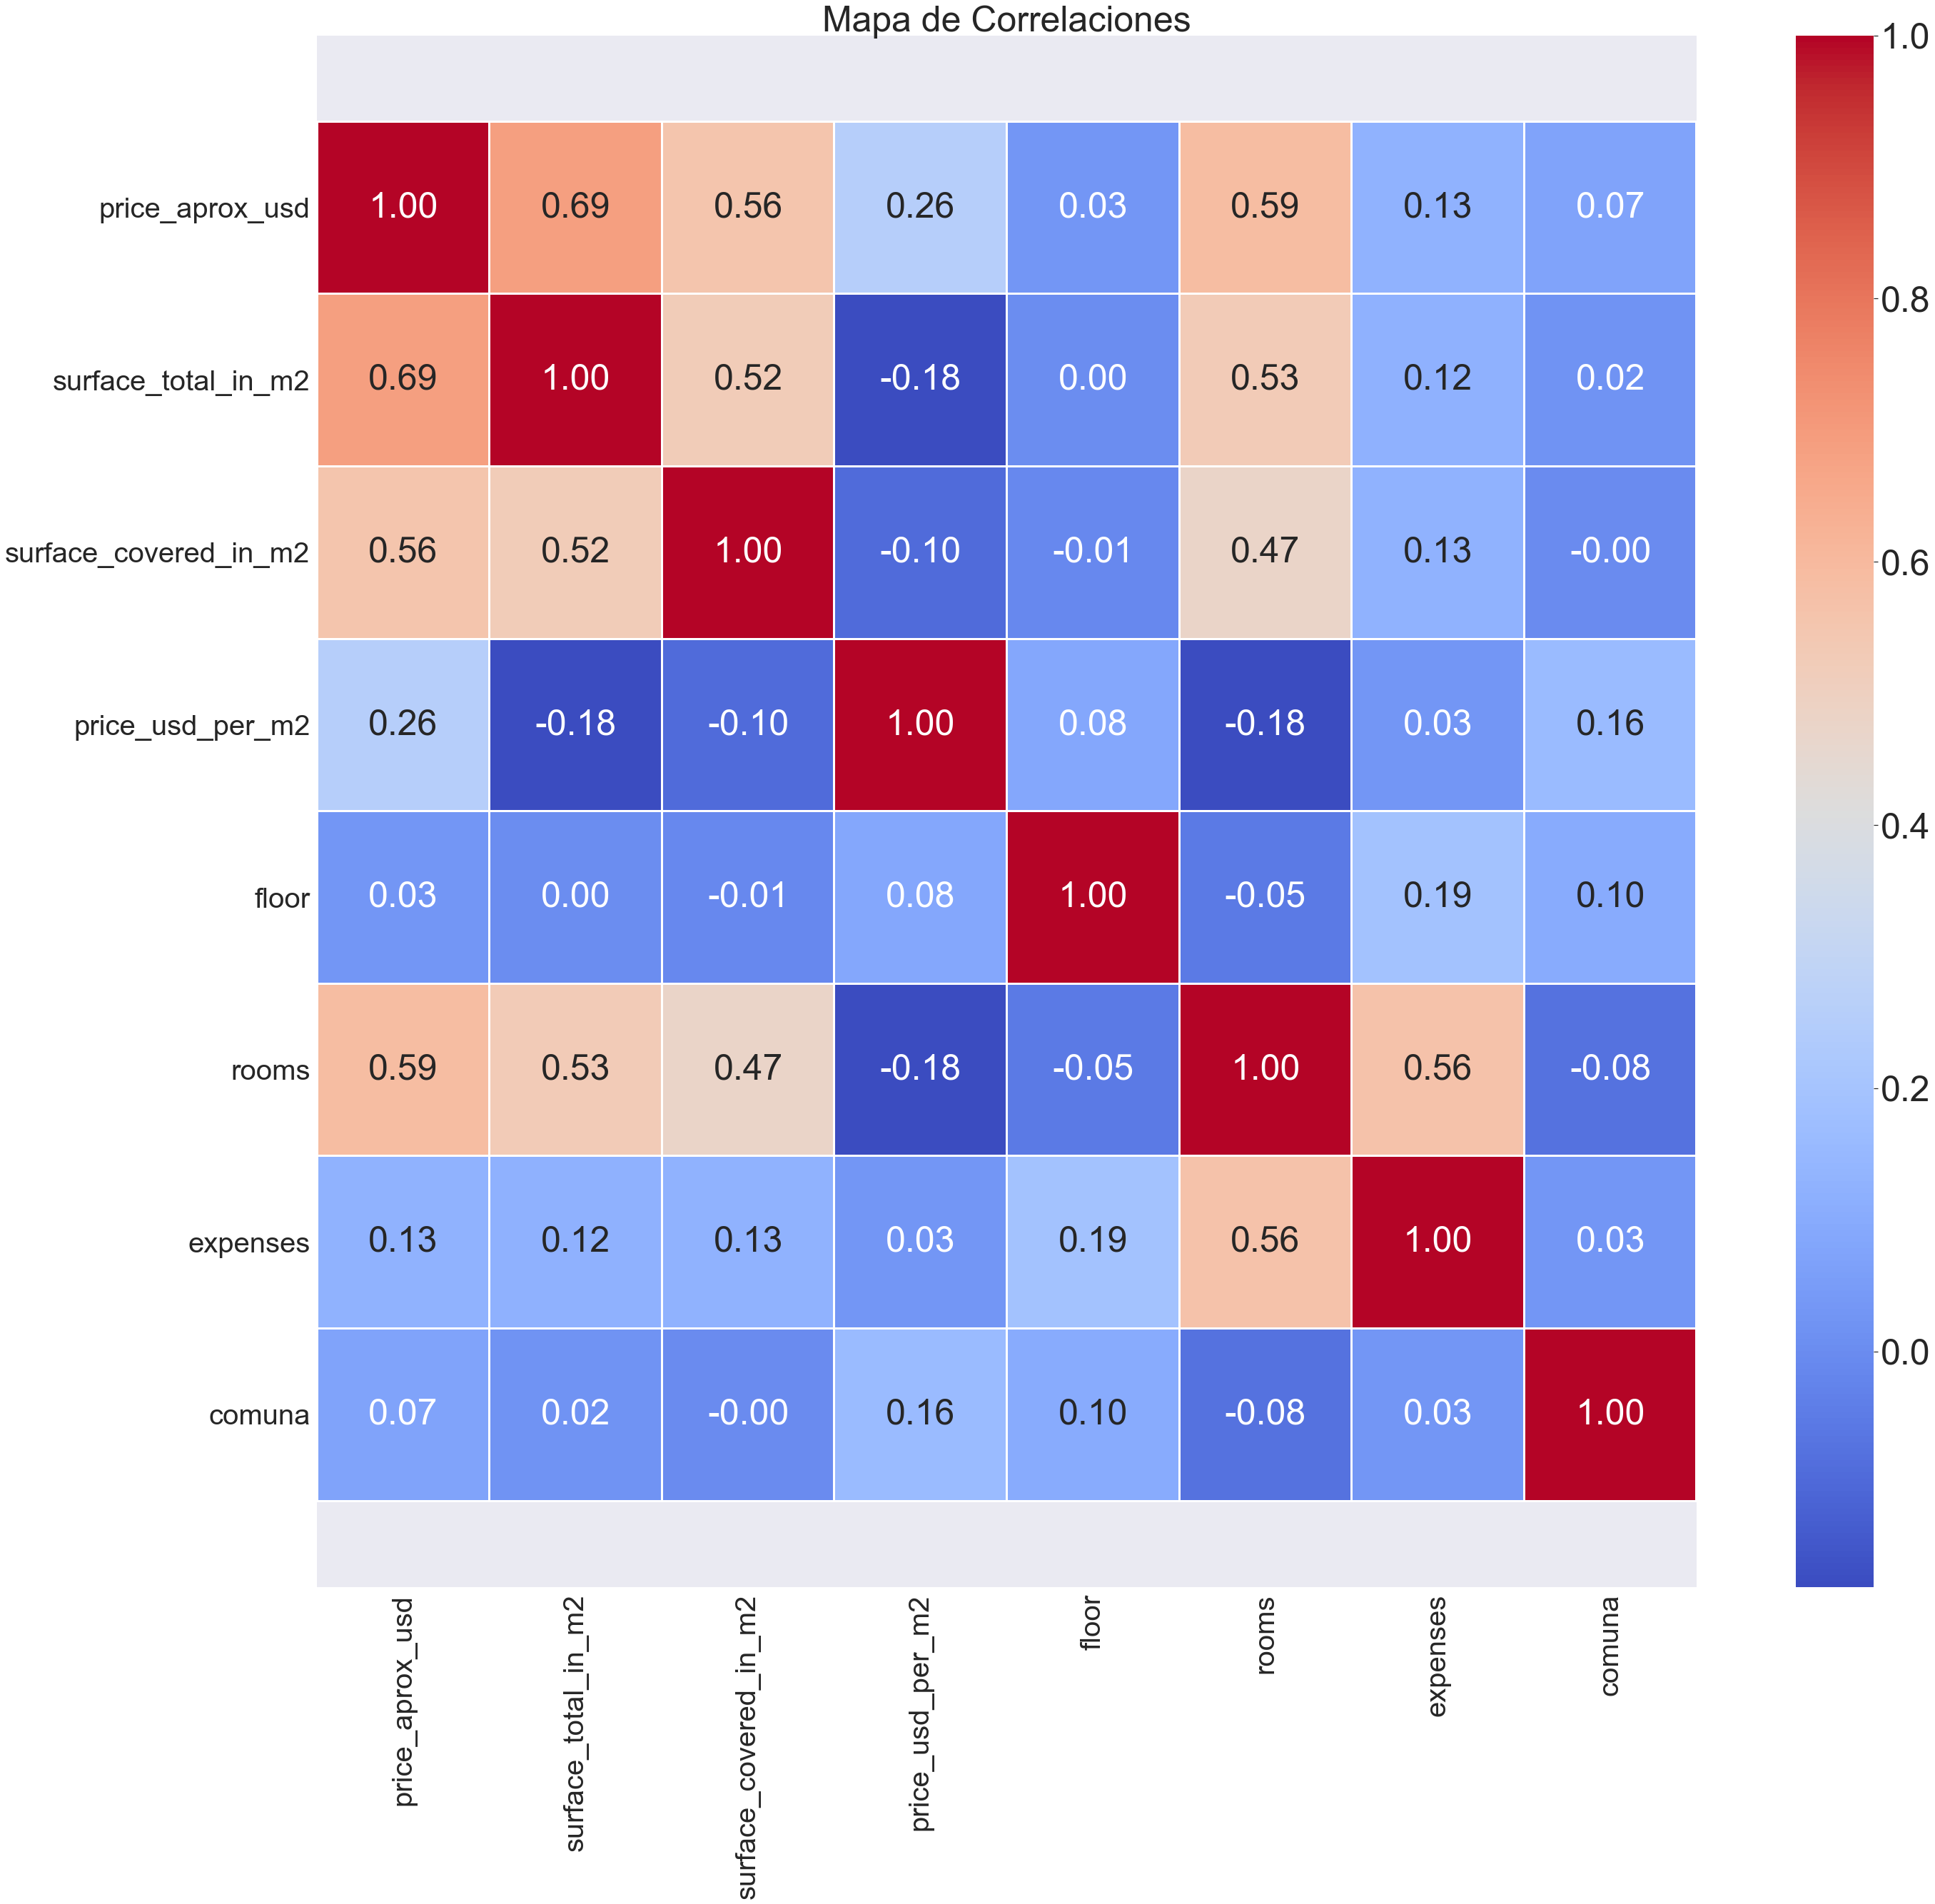

In [109]:
plt.figure(figsize=(50,40))
xticklabels = df_filtered_2.columns
yticklabels = df_filtered_2.columns
ax = sns.heatmap(corr, annot=True, linewidth= 2, cbar = True, square = True, fmt= '.2f',annot_kws={'size': 50},
           xticklabels= True, 
           yticklabels= True,
           cmap= 'coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.tick_params(labelsize=40)
plt.title("Mapa de Correlaciones", fontsize =50)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=50)
plt.show()

#### Desafío: planteá alguna estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`.

## Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 

Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.

**9) Mostrá** cuantas instancias existen que tengan el problema de este dato erróneo y guardalas en una variable llamada `wrong_surface_rows`

In [27]:
wrong_surface_rows = df_filtered['surface_total_in_m2'] < df_filtered['surface_covered_in_m2']
wrong_surface_rows.value_counts()

False    12257
True        73
dtype: int64

In [28]:
wrong_surface_rows = df_filtered[df_filtered['surface_total_in_m2'] < df_filtered['surface_covered_in_m2']]

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [29]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [30]:
conteo_puntos = df_filtered.groupby(['lat', 'lon']).size()
conteo_puntos[conteo_puntos > 1].sort_values(ascending=False).head(10)

lat         lon       
-34.589546  -58.397364    149
-34.571150  -58.423297    118
-34.562084  -58.456686     77
-34.620928  -58.445874     45
-34.609821  -58.392606     36
-34.610122  -58.405941     31
-34.597679  -58.443019     31
-34.621184  -58.373116     31
-34.617719  -58.362056     31
-34.598647  -58.439018     29
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [31]:
conteo_puntos.name = 'conteo'

df_filtered = df_filtered.join(conteo_puntos, on=['lat', 'lon'])

df_filtered = df_filtered[df_filtered.conteo <= 5]

Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [32]:
df_filtered.drop('conteo', inplace=True, axis=1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [33]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [34]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [35]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.995413
RETIRO           0.992736
SAN NICOLAS      0.989691
RECOLETA         0.986654
BELGRANO         0.951760
Name: property_type, dtype: float64
Barrios con mayor porcentaje de casas y phs: 
  barrio
VERSALLES            0.608696
MATADEROS            0.604651
VILLA RIACHUELO      0.555556
PARQUE AVELLANEDA    0.544118
VILLA REAL           0.500000
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

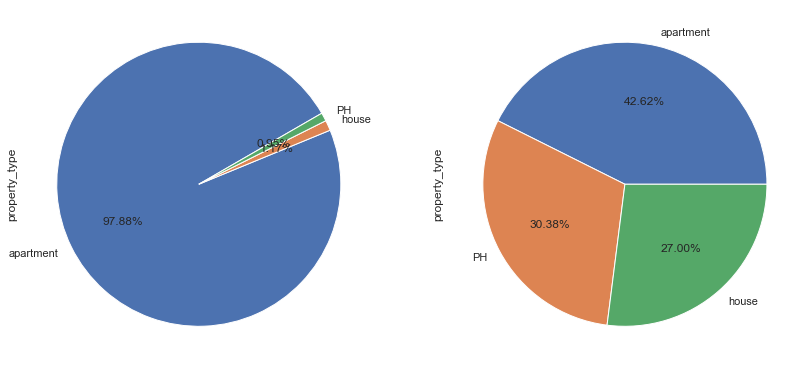

In [36]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [37]:
df_filtered['price_usd_per_m2'].describe()

count     10845.000000
mean       2784.327691
std        1977.498703
min           0.958333
25%        2036.734694
50%        2588.235294
75%        3205.128205
max      142450.141026
Name: price_usd_per_m2, dtype: float64

También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [38]:
q1 = np.quantile(df_filtered['price_usd_per_m2'], 0.25, interpolation='midpoint')
print("Q1 igual a: ",q1)
print("------------")
q3 = np.quantile(df_filtered['price_usd_per_m2'], 0.75, interpolation='midpoint')
print("Q3 igual a: ",q3)

print("------------")
print("RIQ igual a: ",q3 - q1)

Q1 igual a:  2036.7346938775506
------------
Q3 igual a:  3205.128205128205
------------
RIQ igual a:  1168.3935112506545


### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [39]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [40]:
df_filtered['price_usd_per_m2'].describe()

count    8675.000000
mean     2631.993678
std       608.510986
min      1552.631579
25%      2149.766355
50%      2588.235294
75%      3057.142857
max      4095.890411
Name: price_usd_per_m2, dtype: float64

In [41]:
## La mediana no cambia porque es insensible a los outliers.

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

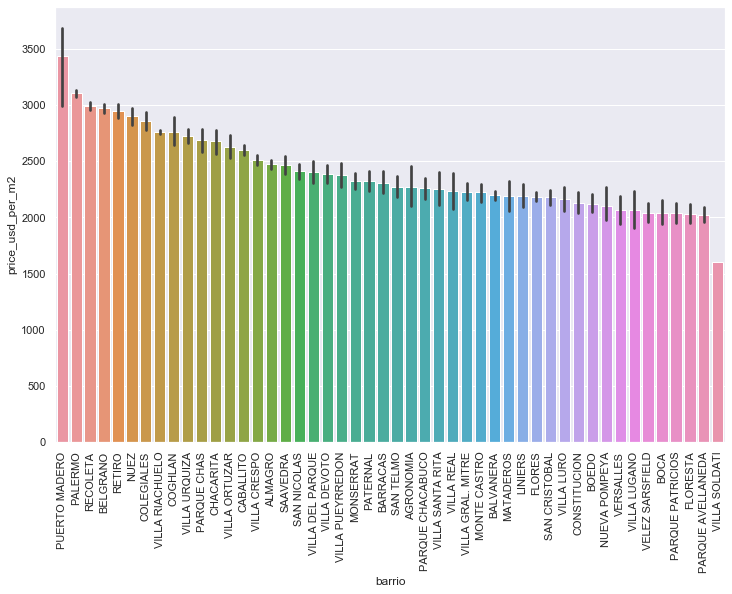

In [42]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [43]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [44]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [45]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

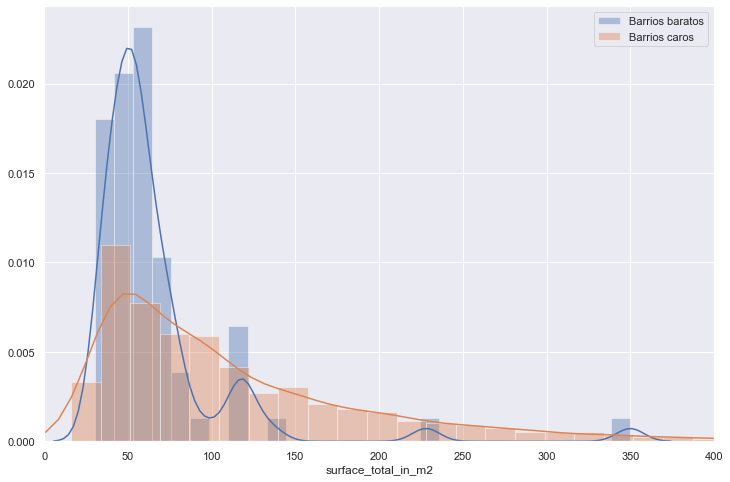

In [46]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

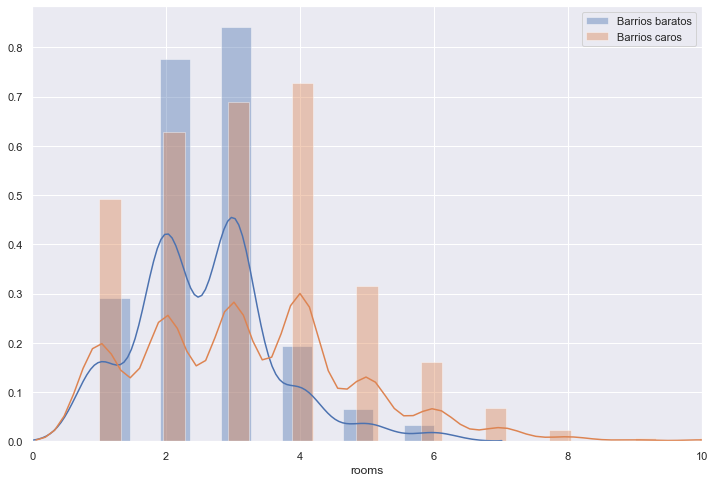

In [47]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

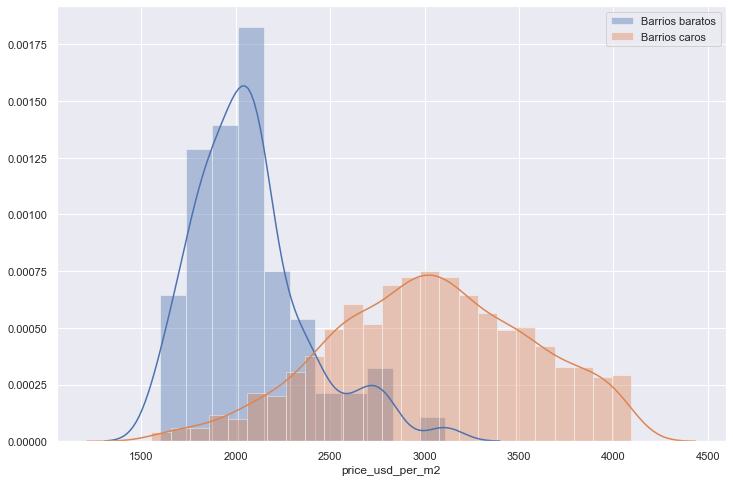

In [48]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [49]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

array([5, 6, 4], dtype=int64)

Como algunos tienen 4 elementos, debemos quitarlos.

In [50]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [51]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [52]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [53]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

barrio
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                         CABALLITO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                             ALMAGRO
CABALLITO               PARQUE CENTENARIO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                         VERSALLES
MATADEROS                         LINIERS
MONSERRAT                       SAN TELMO
MONTE CASTRO                 VILLA DEVOTO
NUEVA POMPEYA            PARQUE PATRICIOS
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.